In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_noduplicates.csv")

In [3]:
df.describe(include='all')

,...1,Animal #,Species,Primary Breed,Gender,Altered,Intake Date,Intake Subtype,Location Found,Jurisdiction In,...,...20,...21,...22,...23,LocationPlus,address_google,pnt,lon,lat,Duplicates
count,6424.000000,6424,6424,6424,6424,6424,6424,6424,6424,6424,...,107.000000,1022,1045,1043.000000,6424,6424,6424,6424.000000,6424.000000,6424.000000
unique,NaN,6322,9,168,3,2,6078,9,4355,48,...,NaN,82,8,NaN,4642,2171,2100,NaN,NaN,NaN
top,NaN,A0045185350,Cat,Domestic Shorthair,M,Yes,9/23/2022 8:10,Stray without ID,Carpenter and Packard,Ypsilanti,...,NaN,Ypsilanti,MI,NaN,"Jackson and Zeeb WC-Scio Twp , Michigan","Washtenaw Ave & Golfside Rd, Pittsfield Charte...","-83.6610765, 42.2501431",NaN,NaN,NaN
freq,NaN,4,4677,3679,3380,5793,5,3415,29,1618,...,NaN,333,1037,NaN,25,54,54,NaN,NaN,NaN
mean,5358.023661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,462.644860,NaN,NaN,48115.190796,NaN,NaN,NaN,-83.676080,42.267862,0.176370
std,3362.452355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1767.878103,NaN,NaN,2268.800266,NaN,NaN,NaN,0.169936,0.104895,0.381164
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,3049.000000,NaN,NaN,NaN,-86.200601,41.724553,0.000000
25%,2243.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.500000,NaN,NaN,48105.000000,NaN,NaN,NaN,-83.746468,42.230668,0.000000
50%,5282.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.000000,NaN,NaN,48170.000000,NaN,NaN,NaN,-83.656461,42.256277,0.000000
75%,8278.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,242.000000,NaN,NaN,48197.000000,NaN,NaN,NaN,-83.582597,42.309081,0.000000


In [4]:
# check dog intake type 
df[df.Species=='Dog']['Intake Subtype'].value_counts()

Stray without ID    1219
Stray with ID        342
Kitten/Puppy           5
Orphan Animal          1
Name: Intake Subtype, dtype: int64

In [5]:
# create found variable
df['Returned'] = np.where(df['Outcome Type'].str.contains('Stray Reclaim'),1,0)

In [6]:
df.Returned.value_counts()

0    5327
1    1097
Name: Returned, dtype: int64

In [7]:
# set index for ease to get duplicates
df = df.set_index("Animal #")

In [27]:
# convert to datetime
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['intake_month'] = df['Intake Date'].dt.month
df['YearMonth'] = df['Intake Date'].dt.strftime('%Y-%m')

In [28]:
df_dog = df[df.Species=='Dog']

In [30]:
# check with chipped dogs
chipped = df_dog[df_dog['Intake Subtype']=='Stray with ID']

In [35]:
chipped = chipped.groupby('YearMonth').agg({'Returned':['sum','count']})
#['Returned']['sum']
chipped['rto_rate'] = chipped['Returned']['sum']/chipped['Returned']['count']*100.0

KeyError: 'Returned'

In [31]:
df_dog = df_dog.groupby('YearMonth').agg({'Returned':['sum','count']})
#['Returned']['sum']
df_dog['rto_rate'] = df_dog['Returned']['sum']/df_dog['Returned']['count']*100.0

In [32]:
df_dog

Returned         rto_rate
               sum count           
YearMonth                          
2019-01         10    22  45.454545
2019-02         10    21  47.619048
2019-03          6    22  27.272727
2019-04          7    22  31.818182
2019-05          9    21  42.857143
2019-06          7    19  36.842105
2019-07          8    25  32.000000
2019-08          9    22  40.909091
2019-09         11    26  42.307692
2019-10         14    31  45.161290
2019-11          6    32  18.750000
2019-12          9    24  37.500000
2020-01          5    16  31.250000
2020-02         13    20  65.000000
2020-03         11    20  55.000000
2020-04          9    18  50.000000
2020-05          2     9  22.222222
2020-06          9    14  64.285714
2020-07          1     8  12.500000
2020-08          4    14  28.571429
2020-09         14    18  77.777778
2020-10          7    19  36.842105
2020-11          4    17  23.529412
2020-12          7    12  58.333333
2021-01          4    11  36.363636
2021-02          2     5  40.000000
2021-03          7    13  53.846154
2021-04          8    17  47.058824
2021-05          4    15  26.666667
2021-06         10    22  45.454545
...            ...   ...        ...
2022-04         15    33  45.454545
2022-05          3    18  16.666667
2022-06          8    23  34.782609
2022-07          8    25  32.000000
2022-08          6    33  18.181818
2022-09         22    36  61.111111
2022-10         15    32  46.875000
2022-11          6    21  28.571429
2022-12          1    14   7.142857
2023-01         11    27  40.740741
2023-02          6    15  40.000000
2023-03         10    25  40.000000
2023-04          7    32  21.875000
2023-05         13    33  39.393939
2023-06         14    33  42.424242
2023-07         10    27  37.037037
2023-08          6    24  25.000000
2023-09          6    25  24.000000
2023-10         18    40  45.000000
2023-11          5    22  22.727273
2023-12         11    37  29.729730
2024-01          3    16  18.750000
2024-02          9    31  29.032258
2024-03         12    32  37.500000
2024-04          8    26  30.769231
2024-05          9    28  32.142857
2024-06         16    30  53.333333
2024-07         10    27  37.037037
2024-08          7    22  31.818182
2024-09         20    36  55.555556

[69 rows x 3 columns]

In [24]:
df[(df.Species=='Dog') & (df.YearMonth=='2022-12')][['Intake Subtype','Outcome Type']]

,Intake Subtype,Outcome Type
Animal #,,
A0051623577,Stray with ID,Stray Reclaim-Microchip
A0051627432,Stray without ID,Adoption
A0051680260,Stray without ID,Adoption
A0051689073,Stray without ID,Adoption
A0051725540,Stray without ID,Adoption
A0051725014,Stray without ID,Adoption
A0051631213,Stray without ID,Adoption
A0051743418,Stray without ID,Adoption
A0051750319,Stray without ID,Adoption


In [12]:
df_dog = df_dog.reset_index()
df_dog['year'] = pd.to_datetime(df_dog['YearMonth']).dt.year

In [13]:
df_dog.columns = ['YearMonth','Returned', 'Total', 'rto_rate', 'year']

In [14]:
dog_yearly = df_dog.groupby('year').agg({'Returned':'sum' ,'Total':'sum'})

In [15]:
dog_yearly['rto'] = 100.0*dog_yearly.Returned/dog_yearly.Total

In [16]:
dog_yearly

,Returned,Total,rto
year,,,
2019,106,287,36.933798
2020,86,185,46.486486
2021,87,202,43.069307
2022,114,305,37.377049
2023,117,340,34.411765
2024,94,248,37.903226


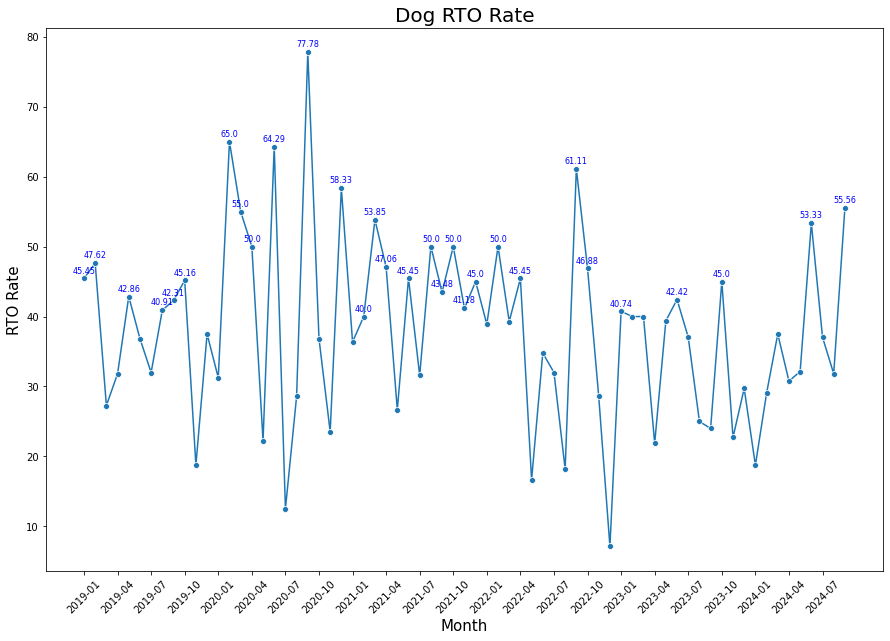

In [17]:
#df_dog = df_dog.reset_index()

plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=df_dog, x='YearMonth', y='rto_rate', marker='o')
plt.title("Dog RTO Rate", fontsize=20)
plt.ylabel("RTO Rate", fontsize=15)
plt.xlabel("Month", fontsize=15)
# Annotate top 10 points for each species
#for species in dog_cts['Species'].unique():
    # Filter data for the current species
#    species_data = monthly_counts_species[monthly_counts_species['Species'] == species]
    
    # Sort by 'Count' and get the top 10 rows
top_30 = df_dog.nlargest(30, 'rto_rate')
    
    # Annotate each of the top 10 points
    #colors = {'Cat':'blue', 'Dog':'orange', 'Other':'darkgreen'}
for _, row in top_30.iterrows():
    ax.text(
            x=row['YearMonth'], 
            y=row['rto_rate'] + .5, 
            s=f"{np.round(row['rto_rate'],2)}", 
            ha='center', 
            va='bottom', 
            fontsize=8, 
            color='b'
        )

plt.xticks(rotation=45)
#filtered_species = monthly_counts_species[monthly_counts_species['Species'] == 'Cat']
every_3rd = df_dog['YearMonth'].iloc[::3]
#every_3rd = monthly_counts_species['YearMonth'].iloc[::3]
ax.set_xticks(every_3rd)
ax.set_xticklabels(every_3rd, rotation=45);
plt.savefig("Dogs_monthly_RTO_rate.png")

In [38]:
chipped = chipped.reset_index()

In [39]:
chipped.columns = ['YearMonth','Returned', 'Total', 'rto_rate']

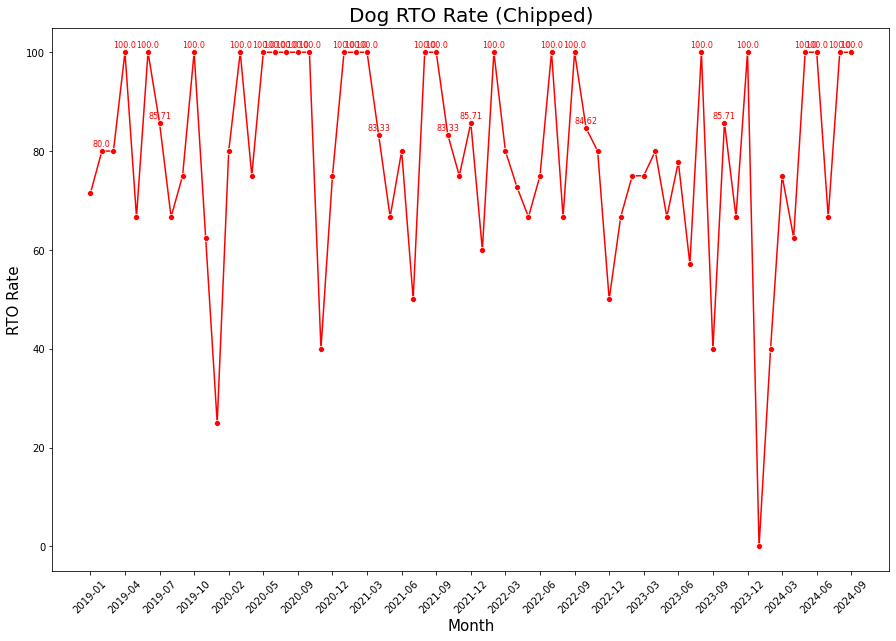

In [40]:
#df_dog = df_dog.reset_index()

plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=chipped, x='YearMonth', y='rto_rate', marker='o', color='red')
plt.title("Dog RTO Rate (Chipped)", fontsize=20)
plt.ylabel("RTO Rate", fontsize=15)
plt.xlabel("Month", fontsize=15)
# Annotate top 10 points for each species
#for species in dog_cts['Species'].unique():
    # Filter data for the current species
#    species_data = monthly_counts_species[monthly_counts_species['Species'] == species]
    
    # Sort by 'Count' and get the top 10 rows
top_30_c = chipped.nlargest(30, 'rto_rate')
    
    # Annotate each of the top 10 points
    #colors = {'Cat':'blue', 'Dog':'orange', 'Other':'darkgreen'}
for _, row in top_30_c.iterrows():
    ax.text(
            x=row['YearMonth'], 
            y=row['rto_rate'] + .5, 
            s=f"{np.round(row['rto_rate'],2)}", 
            ha='center', 
            va='bottom', 
            fontsize=8, 
            color='r'
        )

plt.xticks(rotation=45)
#filtered_species = monthly_counts_species[monthly_counts_species['Species'] == 'Cat']
every_3rd = chipped['YearMonth'].iloc[::3]
#every_3rd = monthly_counts_species['YearMonth'].iloc[::3]
ax.set_xticks(every_3rd)
ax.set_xticklabels(every_3rd, rotation=45);
plt.savefig("Dogs_monthly_RTO_rate_chipped.png")